# Trabalho 2 - Aprendizado de Máquina - Davi Santos Ferrarez

Classificação de Segmentação de Clientes https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Test.csv

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
import pandas as pd

dataset = r"C:\Users\davif\Downloads\customer_classification.csv"

classificacao_clientes = pd.read_csv(dataset)

In [5]:
classificacao_clientes.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6,D
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6,B
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6,B


In [6]:
classificacao_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [7]:
classificacao_clientes.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [8]:
classificacao_clientes["Ever_Married"].mode()[0]

'Yes'

In [9]:
classificacao_clientes["Ever_Married"] = classificacao_clientes["Ever_Married"].fillna("Yes")

In [10]:
classificacao_clientes["Ever_Married"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Ever_Married
Non-Null Count  Dtype 
--------------  ----- 
2627 non-null   object
dtypes: object(1)
memory usage: 20.7+ KB


In [11]:
classificacao_clientes["Graduated"].mode()[0]

'Yes'

In [12]:
classificacao_clientes["Graduated"] = classificacao_clientes["Graduated"].fillna("Yes")

In [13]:
classificacao_clientes["Graduated"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Graduated
Non-Null Count  Dtype 
--------------  ----- 
2627 non-null   object
dtypes: object(1)
memory usage: 20.7+ KB


In [14]:
classificacao_clientes["Profession"].mode()[0]

'Artist'

In [15]:
classificacao_clientes["Profession"] = classificacao_clientes["Profession"].fillna("Artist")

In [16]:
classificacao_clientes["Profession"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Profession
Non-Null Count  Dtype 
--------------  ----- 
2627 non-null   object
dtypes: object(1)
memory usage: 20.7+ KB


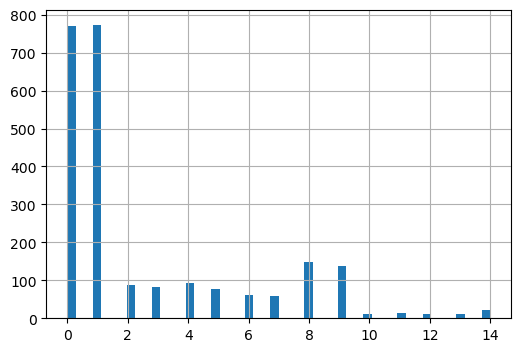

In [17]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

classificacao_clientes["Work_Experience"].hist(bins=50, figsize=(6, 4))
plt.show()

In [18]:
classificacao_clientes["Work_Experience"].median()

1.0

In [19]:
classificacao_clientes["Work_Experience"] = classificacao_clientes["Work_Experience"].fillna(1.0)

In [20]:
classificacao_clientes["Work_Experience"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Work_Experience
Non-Null Count  Dtype  
--------------  -----  
2627 non-null   float64
dtypes: float64(1)
memory usage: 20.7 KB


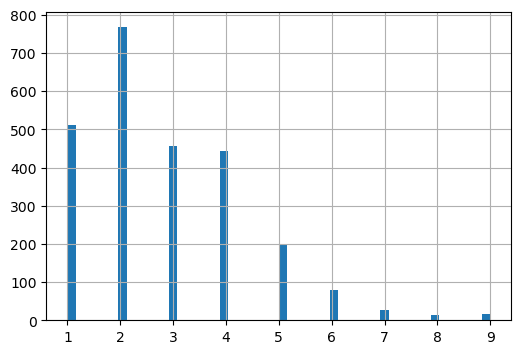

In [21]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

classificacao_clientes["Family_Size"].hist(bins=50, figsize=(6, 4))
plt.show()

In [22]:
classificacao_clientes["Family_Size"].median()

2.0

In [23]:
classificacao_clientes["Family_Size"] = classificacao_clientes["Family_Size"].fillna(2.0)

In [24]:
classificacao_clientes["Family_Size"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Family_Size
Non-Null Count  Dtype  
--------------  -----  
2627 non-null   float64
dtypes: float64(1)
memory usage: 20.7 KB


In [25]:
classificacao_clientes["Var_1"].mode()[0]

'Cat_6'

In [26]:
classificacao_clientes["Var_1"] = classificacao_clientes["Var_1"].fillna("Cat_6")

In [27]:
classificacao_clientes["Var_1"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2627 entries, 0 to 2626
Series name: Var_1
Non-Null Count  Dtype 
--------------  ----- 
2627 non-null   object
dtypes: object(1)
memory usage: 20.7+ KB


In [28]:
classificacao_clientes["Gender"] = classificacao_clientes["Gender"].map({"Female": 1, "Male": 2}) 

In [29]:
classificacao_clientes["Ever_Married"] = classificacao_clientes["Ever_Married"].map({"Yes": 1, "No": 0})

In [30]:
classificacao_clientes["Profession"].unique()

array(['Engineer', 'Healthcare', 'Artist', 'Executive', 'Marketing',
       'Doctor', 'Lawyer', 'Entertainment', 'Homemaker'], dtype=object)

In [31]:
classificacao_clientes["Profession"] = classificacao_clientes["Profession"].map({"Engineer": 1, "Healthcare": 2, "Artist": 3,
                                                                                 "Executive": 4, "Marketing": 5, "Doctor": 6,
                                                                                 "Lawyer": 7, "Entertainment": 8, "Homemaker": 9})

In [32]:
classificacao_clientes["Spending_Score"].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [33]:
classificacao_clientes["Spending_Score"] = classificacao_clientes["Spending_Score"].map({"Low": 1, "Average": 2, "High": 3})

In [34]:
classificacao_clientes["Var_1"].unique()

array(['Cat_6', 'Cat_4', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5', 'Cat_7'],
      dtype=object)

In [35]:
classificacao_clientes["Var_1"] = classificacao_clientes["Var_1"].map({"Cat_1": 1, "Cat_2": 2, "Cat_3": 3,
                                                                       "Cat_4": 4, "Cat_5": 5, "Cat_6": 6,
                                                                       "Cat_7": 7})

In [36]:
classificacao_clientes["Segmentation"].unique()

array(['B', 'A', 'C', 'D'], dtype=object)

In [37]:
classificacao_clientes["Segmentation"] = classificacao_clientes["Segmentation"].map({"A": 1, "B": 2, "C": 3, "D": 4})

In [38]:
classificacao_clientes = classificacao_clientes.drop("ID", axis=1)
classificacao_clientes

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,1,36,Yes,1,0.0,1,1.0,6,2
1,2,1,37,Yes,2,8.0,2,4.0,6,1
2,1,1,69,No,3,0.0,1,1.0,6,1
3,2,1,59,No,4,11.0,3,2.0,6,2
4,1,0,19,No,5,1.0,1,4.0,6,1
...,...,...,...,...,...,...,...,...,...,...
2622,2,0,29,No,2,9.0,1,4.0,6,2
2623,1,0,35,Yes,6,1.0,1,1.0,6,1
2624,1,0,53,Yes,8,1.0,1,2.0,6,3
2625,2,1,47,Yes,4,1.0,3,5.0,4,3


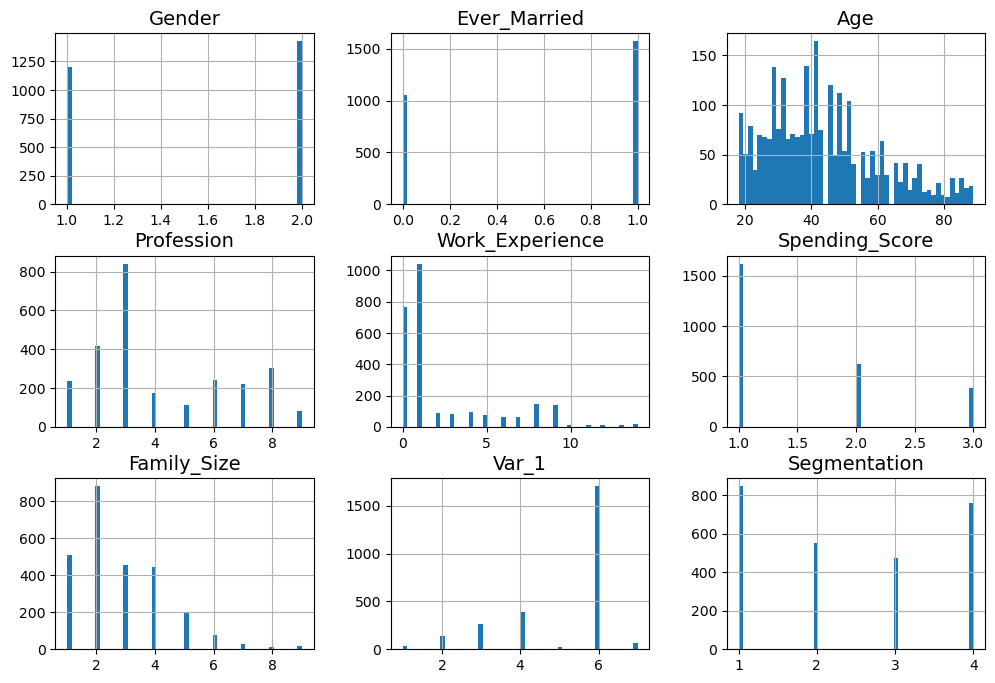

In [39]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

classificacao_clientes.hist(bins=50, figsize=(12, 8))
plt.show()

In [40]:
corr_matrix = classificacao_clientes.corr(numeric_only=True)

corr_matrix["Segmentation"].sort_values(ascending=False)

Segmentation       1.000000
Family_Size        0.019626
Gender            -0.003860
Var_1             -0.004353
Work_Experience   -0.013678
Profession        -0.026836
Spending_Score    -0.041094
Ever_Married      -0.069649
Age               -0.078762
Name: Segmentation, dtype: float64

<Axes: >

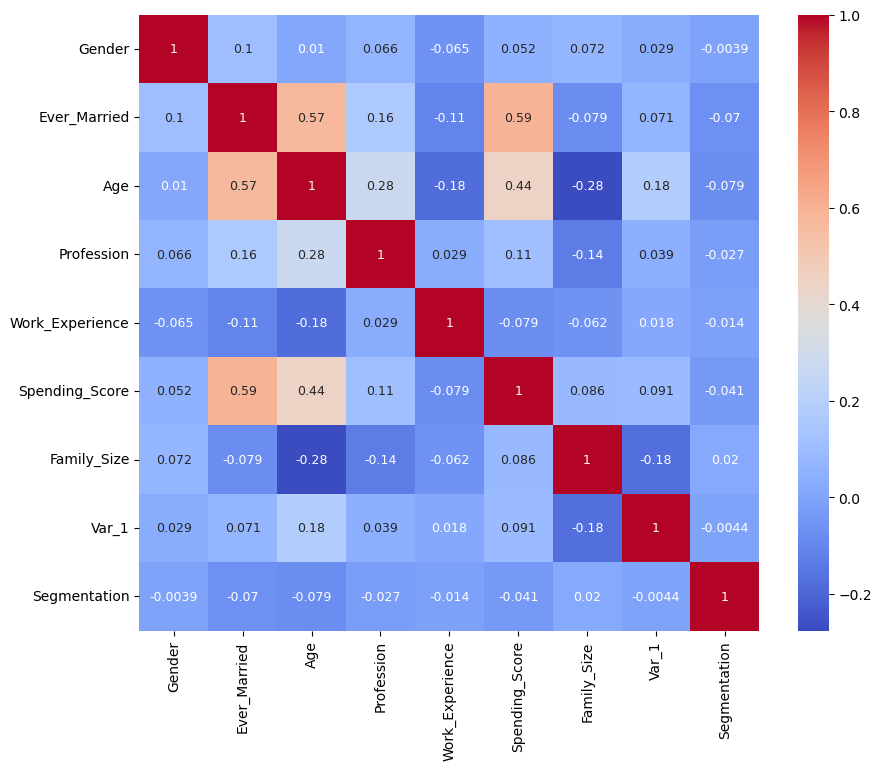

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, annot_kws={"size":9}, cmap = 'coolwarm')

In [42]:
X = classificacao_clientes[["Age", "Profession", "Work_Experience", "Spending_Score", "Family_Size", "Var_1"]]
y = classificacao_clientes[["Segmentation"]]

In [43]:
import pandas as pd

print(pd.DataFrame(X).isnull().sum())

Age                0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


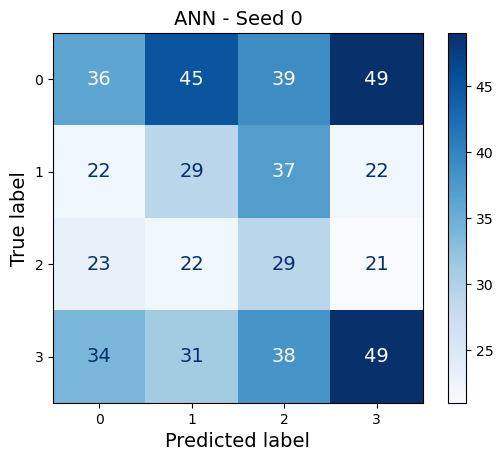

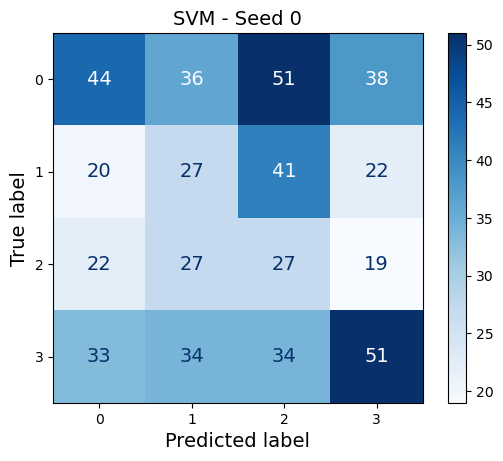

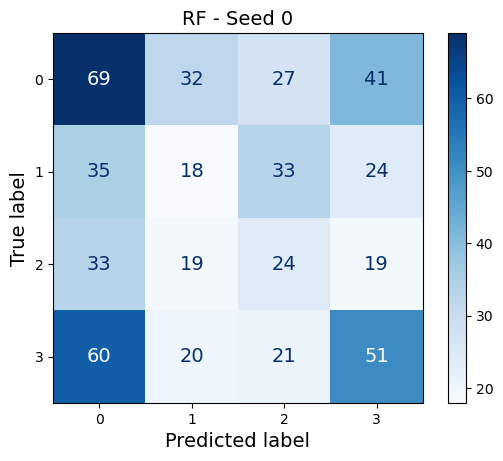

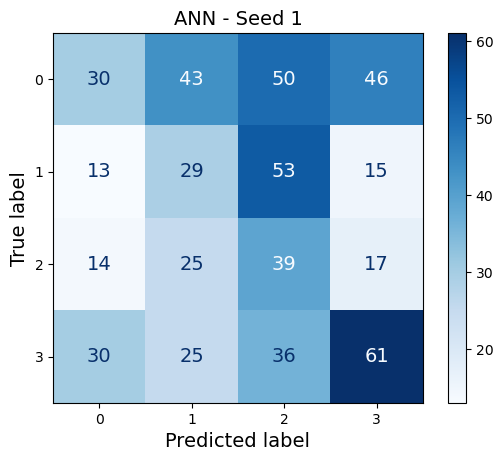

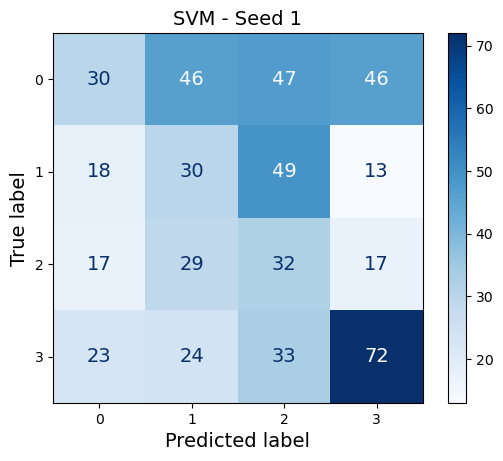

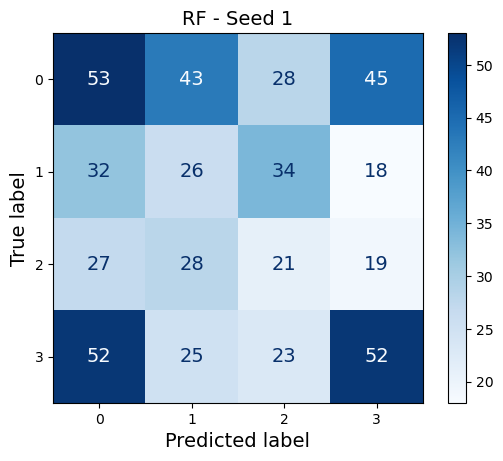

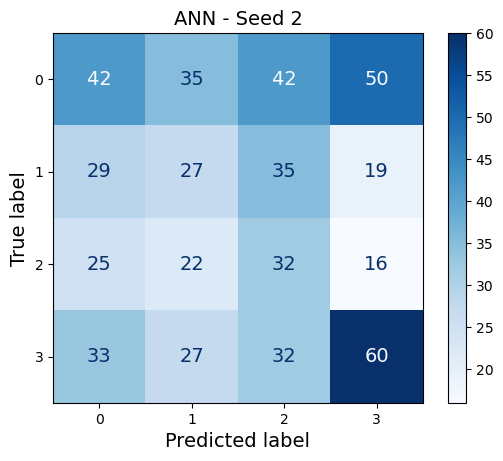

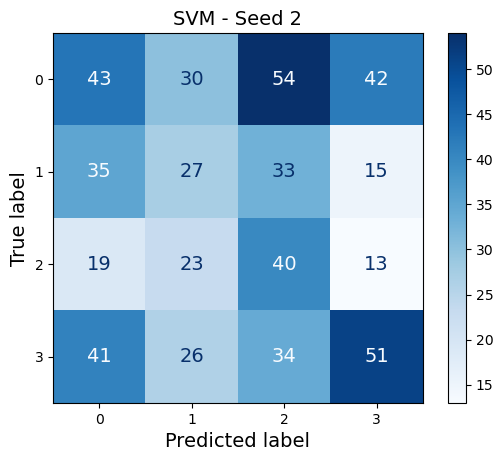

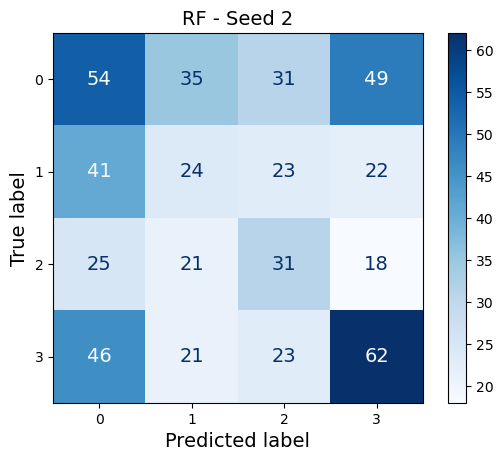

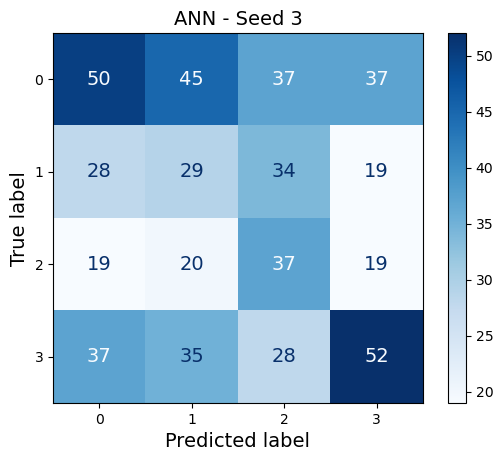

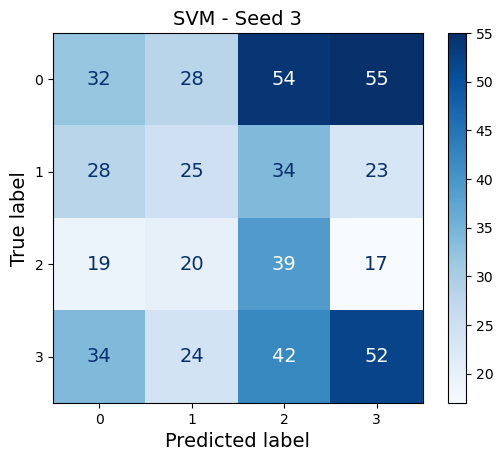

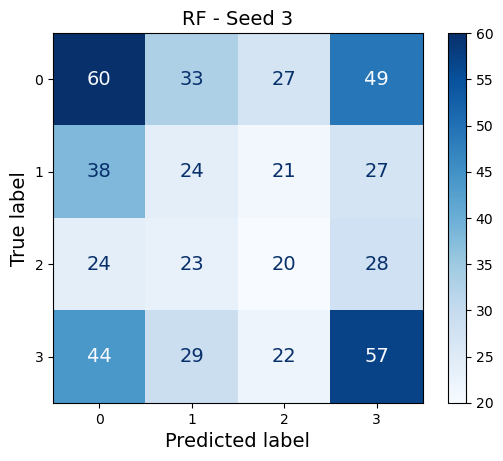

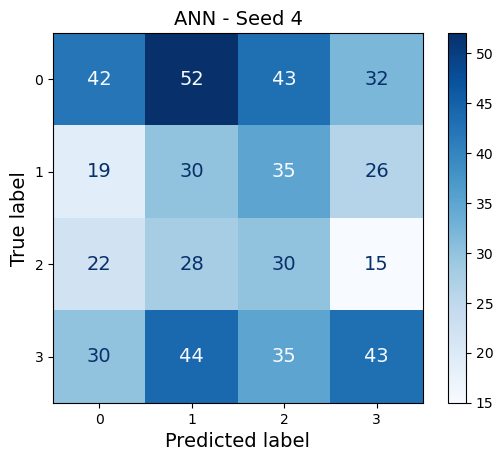

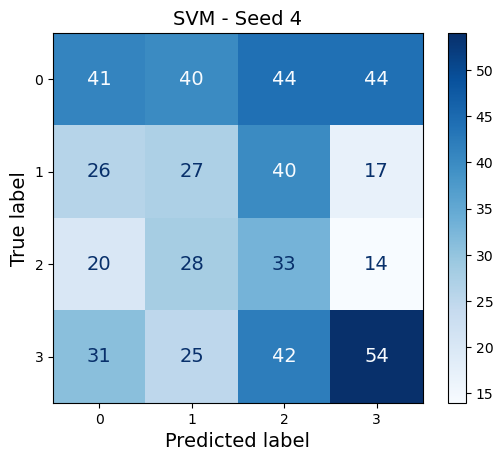

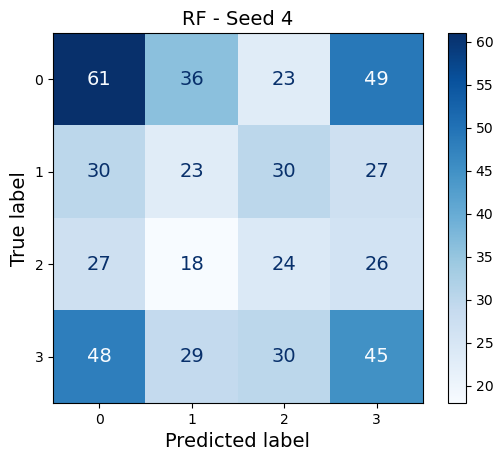

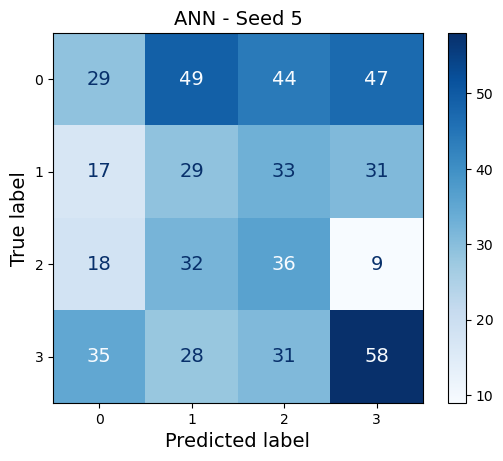

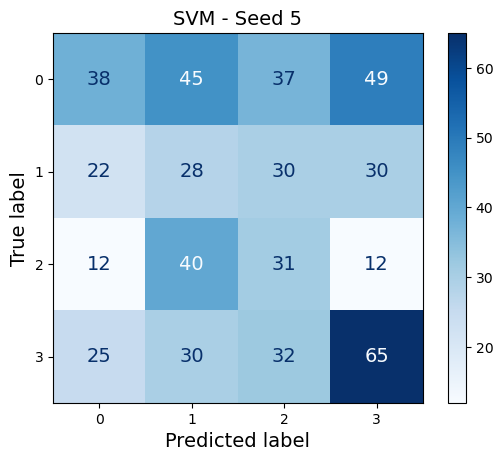

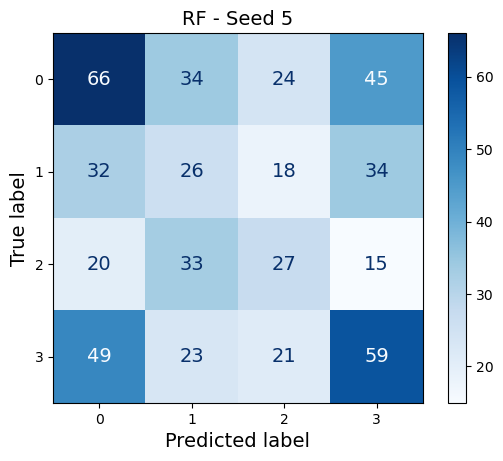

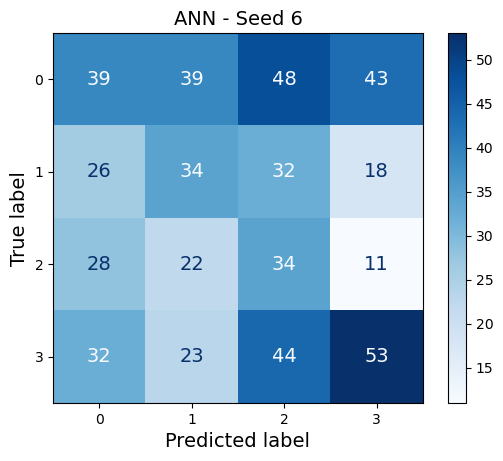

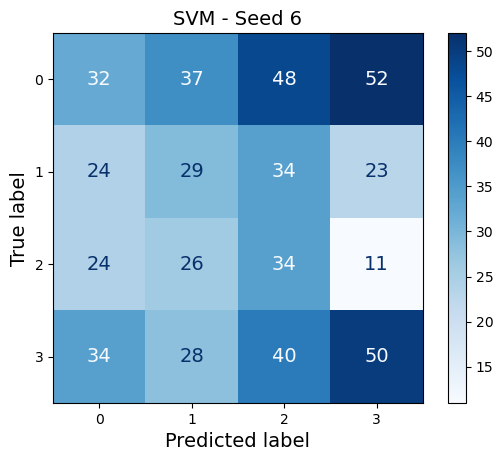

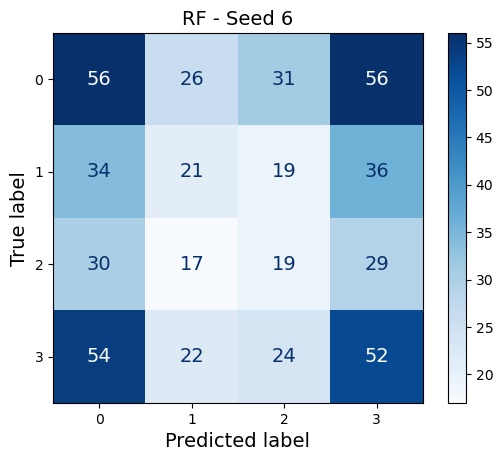

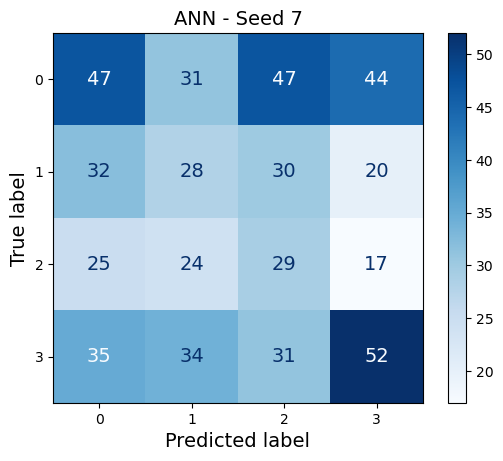

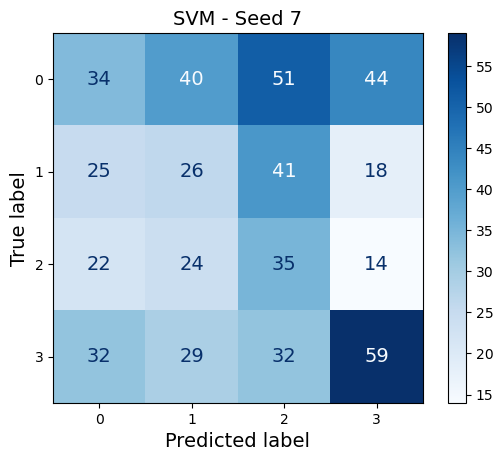

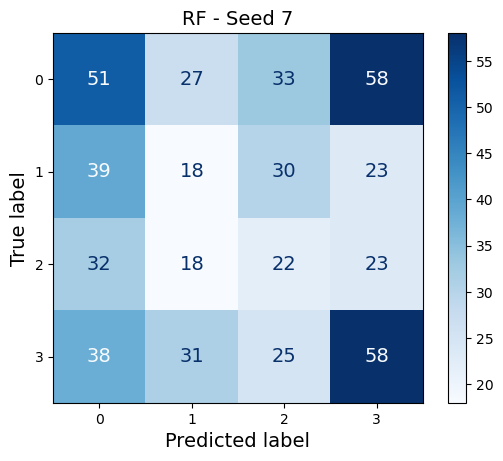

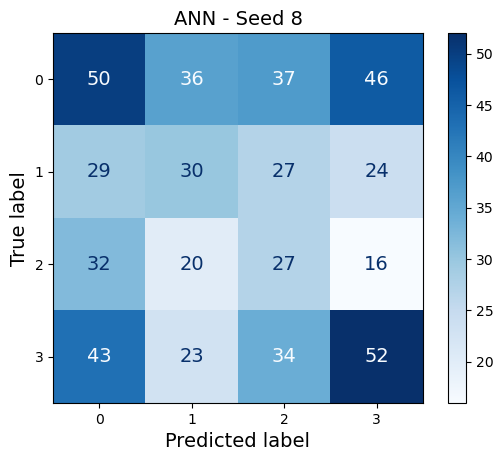

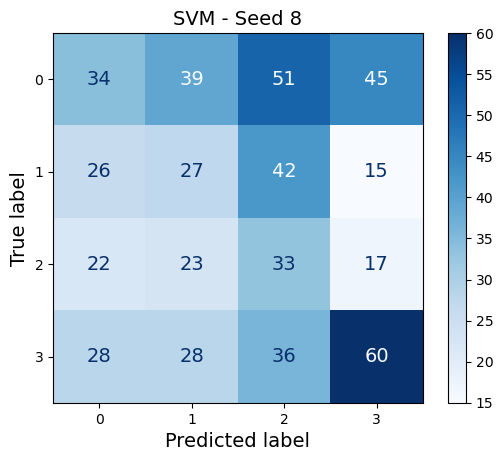

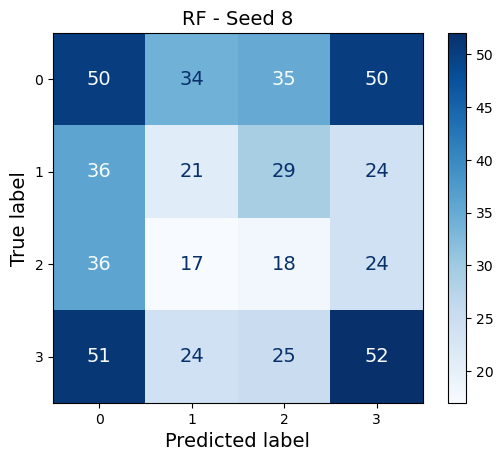

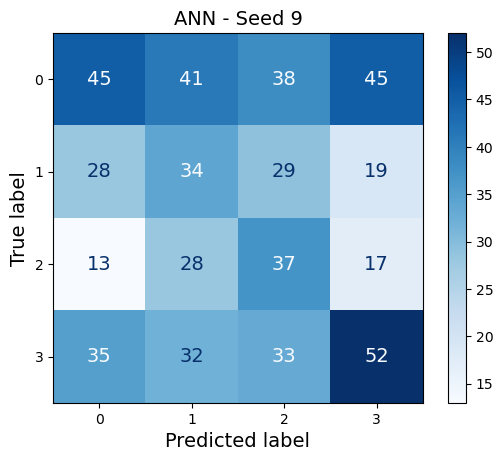

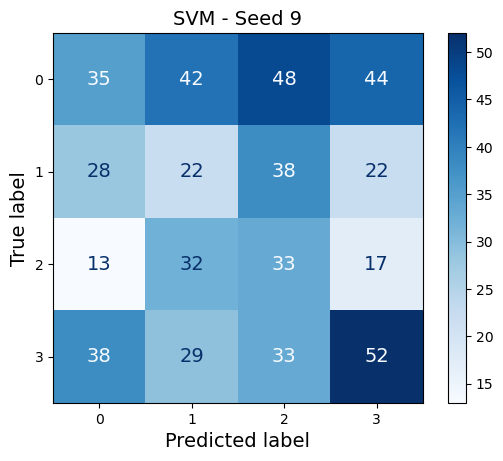

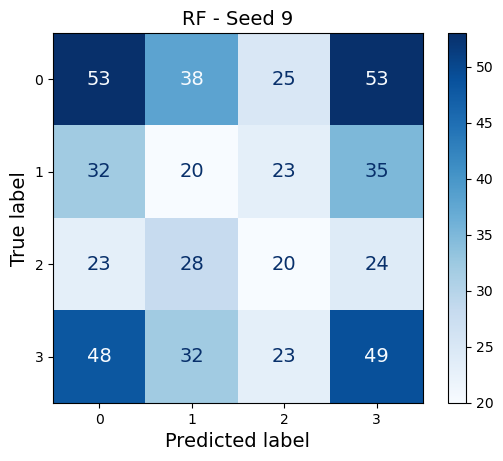

In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

scaler = StandardScaler() #Normalizacao dos dados
X = scaler.fit_transform(X)

modelos_classificacao = {
    "ANN": (MLPClassifier(max_iter=5000), { 
        'hidden_layer_sizes': [(50,), (50, 25)], #Uma camada oculta com 50 neuronios e duas camadas ocultas com 50 e 25 neuronios
        'activation': ['relu', 'tanh'], #relu eh a funcao unitaria linear retificada que retorna f(x) = max(0, x), e tanh mapeia entre -1 e 1
        'alpha': [0.0001, 0.001], #alpha combate o sobreajuste, restringindo o tamanho dos pesos
        'solver': ['adam'] #solver encontra os melhores pesos da rede e adam eh um otimizador estocastico baseado em gradiente
    }),
    "SVM": (SVC(class_weight='balanced'), {
        'C': [1, 10], #C eh o parametro de regularizacao. Quanto menor o C, mais erros sao aceitos  
        'kernel': ['linear', 'rbf'], #tipo de kernel a ser usado. Se nenhum for fornecido, rbf sera usado
        'gamma': ['scale', 'auto'] #gamma eh o coeficiente do kernel. Se for scale, usa 1/(n_features) * X_var(). Se for auto, usa 1/n_features
    }),
    "RF": (RandomForestClassifier(class_weight='balanced'), {
        'n_estimators': [100, 200], #numero de arvores de decisao
        'max_depth': [None, 10], #profundidade maxima das arvores 
        'min_samples_split': [2, 5] #minimo de amostras para dividir um no interno
    })
}

resultados_modelos = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=i) #stratify garante a mesma proporcao de classes
                                                                                                         #tanto para treino quanto para teste

    y_train = y_train.values.ravel() #ravel() converte uma matriz multidimensional em unidimensional
    y_test = y_test.values.ravel() 

    smote = SMOTE(random_state=i) #SMOTE gera amostras de classes minoritarias para balancear a distribuicao de classes
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    for nome_modelo, (modelo, parametros) in modelos_classificacao.items():
        grid_search = GridSearchCV(modelo, parametros, cv=3, scoring='f1_weighted') #f1_weighted eh a media ponderada do f1 por classe
        grid_search.fit(X_train_res, y_train_res)
        y_pred = grid_search.predict(X_test)

        matrix = confusion_matrix(y_test, y_pred)
        display = ConfusionMatrixDisplay(confusion_matrix=matrix)
        display.plot(cmap='Blues', values_format='d')
        plt.title(f'{nome_modelo} - Seed {i}')
        plt.show()

        resultados_modelos.append({
            "Modelo": nome_modelo,
            "Seed": i,
            "Precisao": precision_score(y_test, y_pred, average='weighted', zero_division=0),
            "Matriz de confusao": matrix,
            "Melhores parametros": grid_search.best_params_
        })

resultados = pd.DataFrame(resultados_modelos)
pd.set_option('max_colwidth', 170)

In [71]:
resultados

,Modelo,Seed,Precisao,Matriz de confusao,Melhores parametros
0,ANN,0,0.285382,"[[36, 45, 39, 49], [22, 29, 37, 22], [23, 22, 29, 21], [34, 31, 38, 49]]","{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 25), 'solver': 'adam'}"
1,SVM,0,0.309571,"[[44, 36, 51, 38], [20, 27, 41, 22], [22, 27, 27, 19], [33, 34, 34, 51]]","{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"
2,RF,0,0.305279,"[[69, 32, 27, 41], [35, 18, 33, 24], [33, 19, 24, 19], [60, 20, 21, 51]]","{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}"
3,ANN,1,0.326888,"[[30, 43, 50, 46], [13, 29, 53, 15], [14, 25, 39, 17], [30, 25, 36, 61]]","{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 25), 'solver': 'adam'}"
4,SVM,1,0.334644,"[[30, 46, 47, 46], [18, 30, 49, 13], [17, 29, 32, 17], [23, 24, 33, 72]]","{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"
5,RF,1,0.296320,"[[53, 43, 28, 45], [32, 26, 34, 18], [27, 28, 21, 19], [52, 25, 23, 52]]","{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}"
6,ANN,2,0.316040,"[[42, 35, 42, 50], [29, 27, 35, 19], [25, 22, 32, 16], [33, 27, 32, 60]]","{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 25), 'solver': 'adam'}"
7,SVM,2,0.320051,"[[43, 30, 54, 42], [35, 27, 33, 15], [19, 23, 40, 13], [41, 26, 34, 51]]","{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"
8,RF,2,0.324703,"[[54, 35, 31, 49], [41, 24, 23, 22], [25, 21, 31, 18], [46, 21, 23, 62]]","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}"
9,ANN,3,0.334354,"[[50, 45, 37, 37], [28, 29, 34, 19], [19, 20, 37, 19], [37, 35, 28, 52]]","{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 25), 'solver': 'adam'}"


In [75]:
print(y.value_counts())

Segmentation
1               846
4               759
2               550
3               472
Name: count, dtype: int64
